**ขั้นตอนการใช้งาน classifier เบื้องต้น**

**เรียกใช้ library**
* [matplotlib](https://matplotlib.org)
* [seaborn](https://seaborn.pydata.org/)
* [pandas](https://pandas.org)
* [scikit-learn](https://scikit-learn.org)



Import libary

In [14]:
%pip install seaborn==0.13.0

In [15]:
import warnings
warnings.simplefilter(action='ignore')

In [16]:
# Python version
import sys
import seaborn as sns
import pandas
import sklearn

print('Python: {}'.format(sys.version))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))


Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
seaborn: 0.13.0
pandas: 1.5.3
sklearn: 1.2.2


**โหลดข้อมูล [iris](https://archive.ics.uci.edu/dataset/53/iris) จาก UCI dataset**

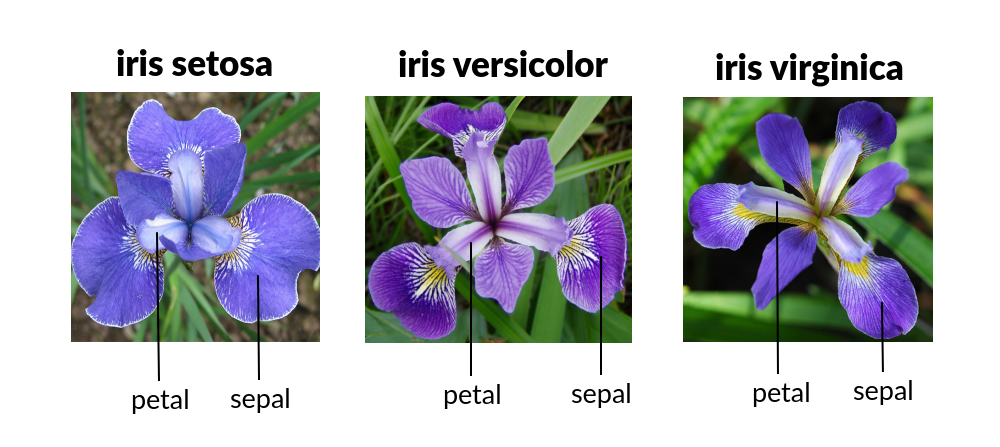





In [17]:
# Load dataset
from pandas import read_csv
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" # this data file is formated as .csv
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = read_csv(url, names=names)

แสดงขนาดของข้อมูล


In [18]:
print(data.shape)

(150, 5)


แสดงตัวอย่างข้อมูล 10 บรรทัดแรก

In [19]:
data.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


แสดงสถิติพื้นฐานของชุดข้อมูล

In [20]:
# descriptions
print(data.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


แสดงการกระจาย ('class') ของข้อมูล

In [21]:
# class distribution
print(data.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


แสดงการกระจายของ feature ด้วย box&whisker plot

<Axes: >

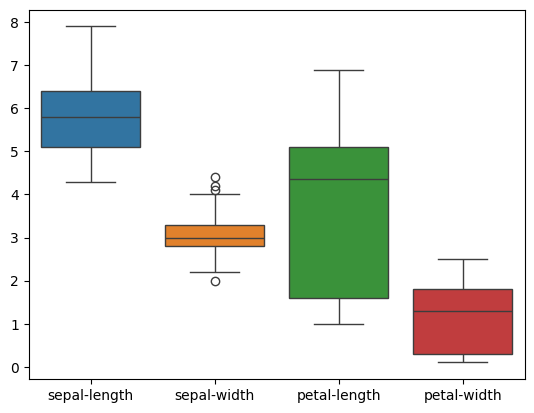

In [22]:
import seaborn as sns
sns.boxplot(data=data)

การกระจายในรูป histogram ของแต่ละ feature

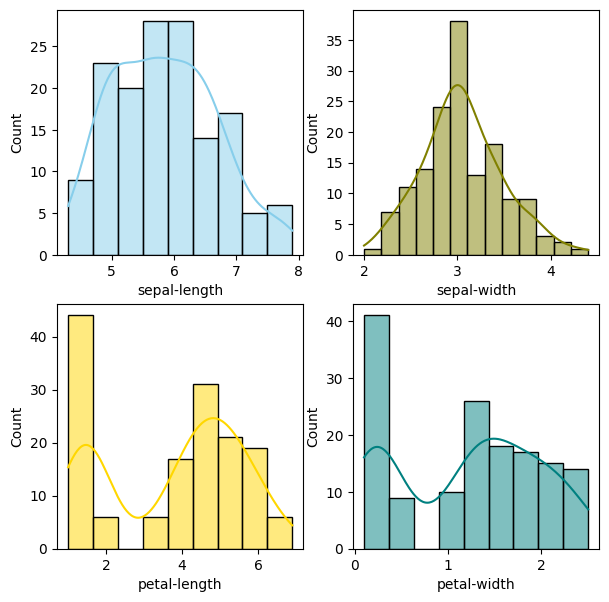

In [23]:
from matplotlib import pyplot
fig, axs = pyplot.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=data, x="sepal-length", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=data, x="sepal-width", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=data, x="petal-length", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=data, x="petal-width", kde=True, color="teal", ax=axs[1, 1])
pyplot.show()

ความสัมพันธ์ระหว่าง คู่ของ feature

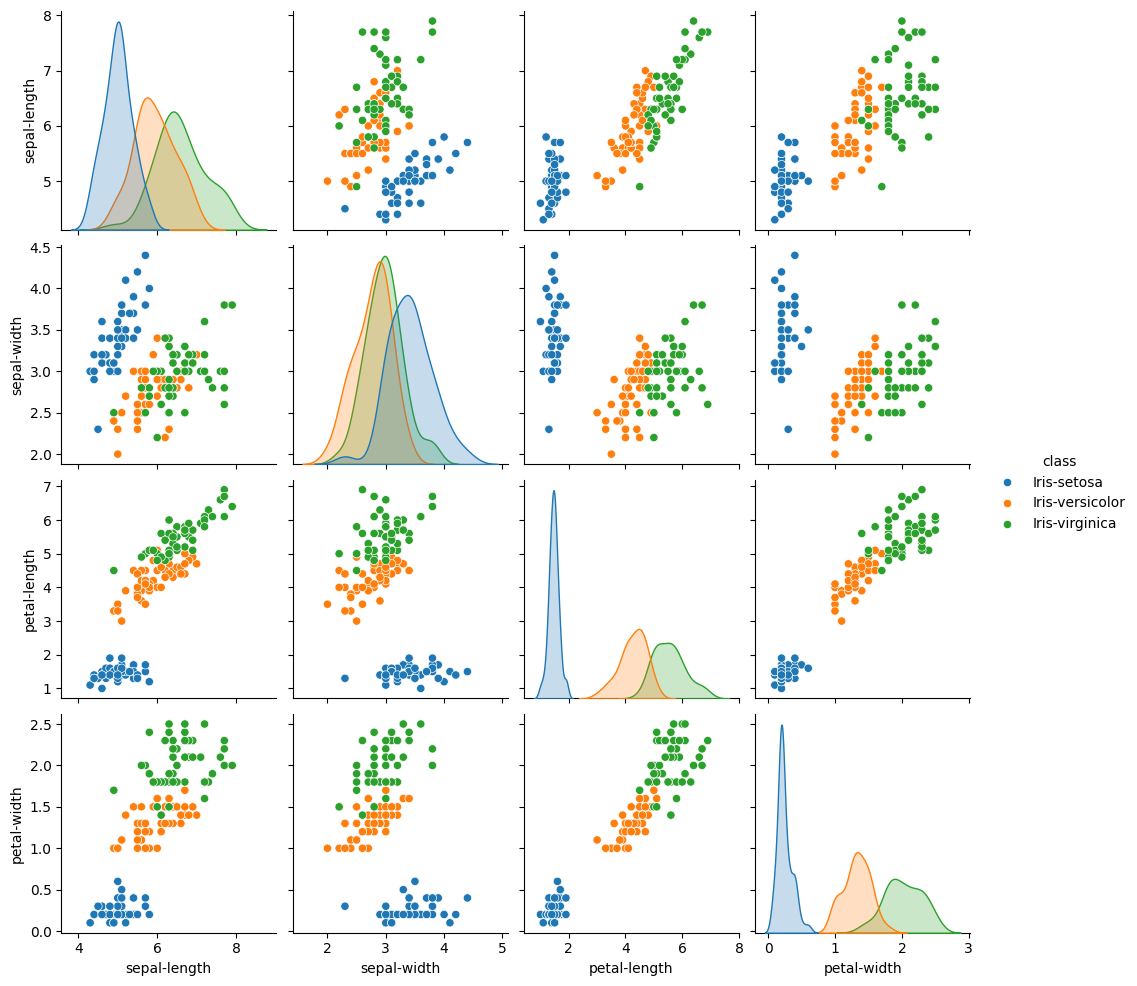

In [24]:
sns.pairplot(data=data,kind='scatter',hue='class')

แยกข้อมูลเป็นสองชุดคือ ชุด train และ test ด้วยสัดส่วน (70:30) (test_size=0.3) จากนั้น แยกข้อมูล train เป็น train กับ validation ด้วยสัดส่วน (75:25) (test_size=0.25)

In [25]:
from sklearn.model_selection import train_test_split# Split-out validation dataset
array = data.values
X = array[:,0:4]
y = array[:,4]


X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.30, random_state=41)
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.25, random_state=41)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(78, 4)
(27, 4)
(45, 4)
(78,)
(27,)
(45,)


ทดสอบ learning machine 6 ตัว ได้แก่ Logistic Regression, Linear Discriminant Analysis, K Nearest Neighbor, Decision Tree, Gaussian Naive Bay และ Support Vector Machine

โดยการทดสอบ จะทำซ้ำ 10 ครั้ง และแสดงผลลัพธ์จากการเฉลี่ยของการทำซ้ำทั้งหมด

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

models = []
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NN', MLPClassifier(hidden_layer_sizes=4)))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('NB', GaussianNB()))


results เป็นสถิติของผลการรันที่สับเปลี่ยนกลุ่มตัวอย่าง 10 รอบ

In [27]:
# Spot Check Algorithms

# evaluate each model in turn
results = []
names = []
best_model_name = ''
max_mean = -1
min_sd = 100000000
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    mean = cv_results.mean()
    sd = cv_results.std()
    print('%s: %f (%f)' % (name, mean, sd))

    if mean > max_mean:
        max_mean = mean
        min_sd = sd
        best_model_name = name
        best_model = model
    elif mean == max_mean:
        if sd < min_sd:
            min_sd = sd
            best_model_name = name
            best_model = model
print("best model = %s (accuracy = %s, sd = %s)"%(best_model_name, max_mean, min_sd))

RF: 0.973214 (0.053720)
SVM: 0.985714 (0.042857)
LDA: 0.987500 (0.037500)
CART: 0.985714 (0.042857)
KNN: 1.000000 (0.000000)
NN: 0.512500 (0.219294)
LR: 0.921429 (0.090773)
NB: 0.973214 (0.053720)
best model = KNN (accuracy = 1.0, sd = 0.0)


เปรียบเทียบ Learning Machine ด้วย box plot

[Text(0, 0, 'RF'),
 Text(1, 0, 'SVM'),
 Text(2, 0, 'LDA'),
 Text(3, 0, 'CART'),
 Text(4, 0, 'KNN'),
 Text(5, 0, 'NN'),
 Text(6, 0, 'LR'),
 Text(7, 0, 'NB')]

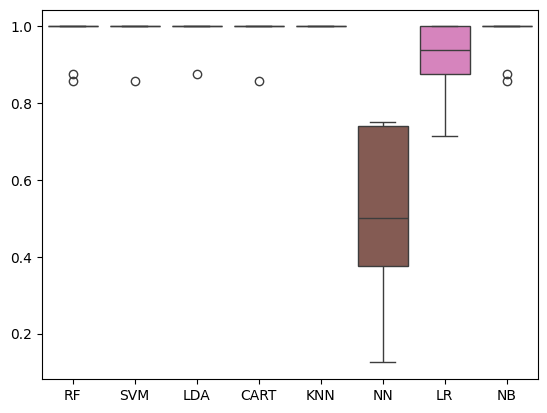

In [28]:
ax = sns.boxplot(results)
ax.set_xticklabels(names)


**สอน best model ให้มีความรู้ ด้วยชุดข้อมูล train1**

In [29]:
print("Selected Model : %s"%(best_model_name))
model = best_model
model.fit(X_train1, y_train1)

Selected Model : KNN


KNeighborsClassifier()

**ทดสอบการพยากรณ์**

In [30]:
predictions = model.predict(X_test)

print(predictions)

['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica']


**ผลการพยากรณ์ แสดงในรูปของ accuracy และ confusion matrix**

In [31]:
from sklearn.metrics import accuracy_score
print("accuracy = %s"%(accuracy_score(y_test, predictions)))

accuracy = 0.9333333333333333


[[11  0  0]
 [ 0 16  2]
 [ 0  1 15]]


<Axes: >

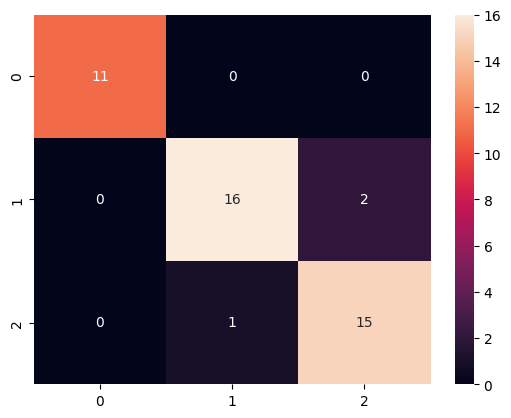

In [32]:
from sklearn.metrics import confusion_matrix
cfm=confusion_matrix(y_test, predictions)
print(cfm)
sns.heatmap(cfm,annot=True)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.94      0.89      0.91        18
 Iris-virginica       0.88      0.94      0.91        16

       accuracy                           0.93        45
      macro avg       0.94      0.94      0.94        45
   weighted avg       0.93      0.93      0.93        45

